# Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.

Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.

Year. Number of years in current rank.

Degree. Highest degree. 1 for doctorate, 0 for master's.

YSdeg. Years since highest degree was earned.

Salary. Salary/year in dollars.

# Tasks
1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best  R2  score.
3. Report whether sex is a factor in salary.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

# Data Cleaning

In [3]:
df.shape

(52, 6)

In [4]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [5]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [6]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(52, 6)

In [8]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [9]:
# Year
iqr = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Year'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Year'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 8.0
Upper Threshold : 23.0
Lower Threshold : -9.0


In [10]:
# YSdeg
iqr = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['YSdeg'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 16.5
Upper Threshold : 48.0
Lower Threshold : -18.0


# EDA

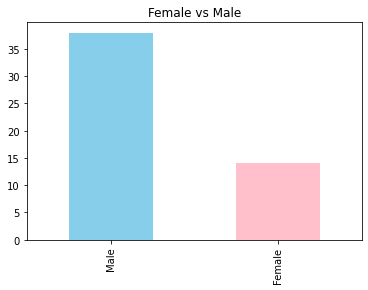

In [11]:
# Sex
sex = df['Sex'].map({0:'Male',1:'Female'}).value_counts()
sex.plot(kind = 'bar', color = ['skyblue', 'pink'])
plt.title('Female vs Male')
plt.show()

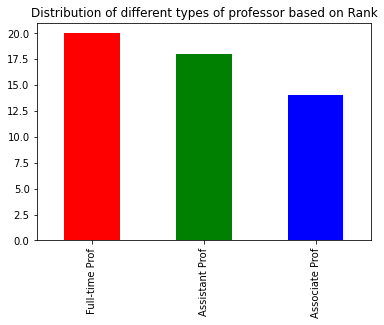

In [12]:
# Rank
rank = df['Rank'].map({1:'Assistant Prof',2:'Associate Prof',3:'Full-time Prof'}).value_counts()
rank.plot(kind = 'bar', color = ['red','green','blue'])
plt.title('Distribution of different types of professor based on Rank')

plt.show()

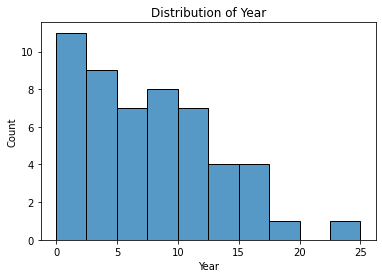

In [13]:
# Year
sns.histplot(df['Year'], bins = 10)
plt.title('Distribution of Year')
plt.show()

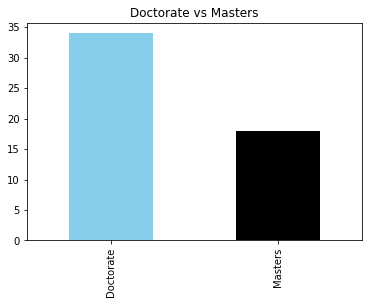

In [14]:
# Degree
deg = df['Degree'].map({1:'Doctorate',0:'Masters'}).value_counts()
deg.plot(kind = 'bar', color = ['skyblue', 'black'])
plt.title('Doctorate vs Masters')
plt.show()

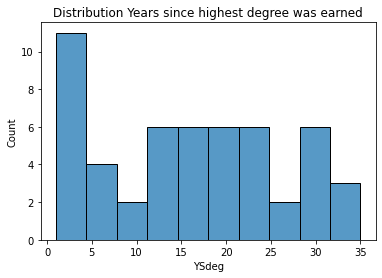

In [15]:
# YSdeg
sns.histplot(df['YSdeg'], bins = 10)
plt.title('Distribution Years since highest degree was earned')
plt.show()

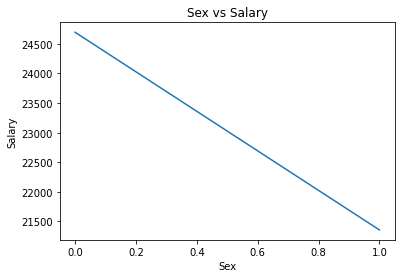

In [16]:
# Sex vs Salary
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [17]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


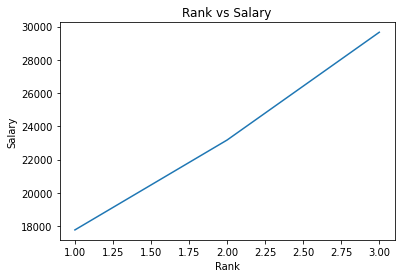

In [18]:
# Rank vs Salary
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [19]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


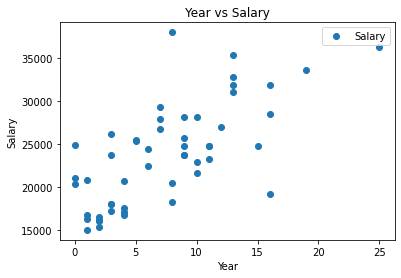

In [20]:
# Year vs Salary
df.plot(x = 'Year', y = 'Salary', style = 'o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [21]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


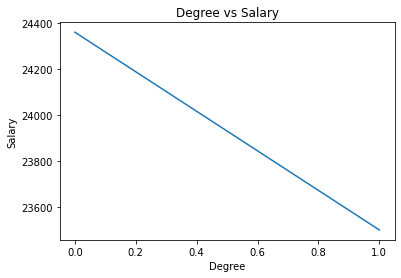

In [22]:
# Degree vs Salary
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [23]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


Even after tried various transformations for Degree, there was no correlation between them.

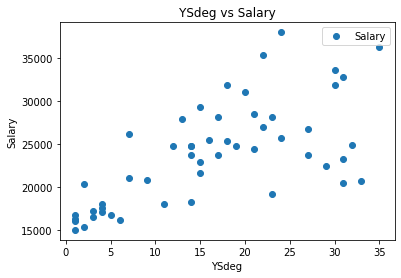

In [24]:
# YSdeg vs Salary
df.plot(x = 'YSdeg', y = 'Salary', style = 'o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [25]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


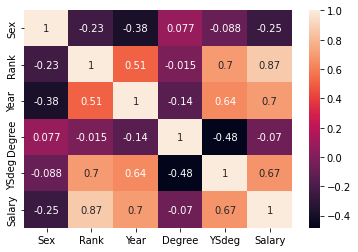

In [26]:
sns.heatmap(df.corr(), annot = True)
plt.show()

As we can see, there are correlations between Sex, Rank, Year, YSDeg and Salary, but no correlation between Degree and Salary.

Usually, we take only the features which has correlation between them for proceeding with linear regression model.

Here, in the problem statement they have mentioned to take all the features for model training. So, we are going to take all the features.

# Data preprocessing

In [27]:
X = df[['Sex','Rank','Year','Degree','YSdeg']].values  # Features
y = df['Salary'].values    # Target

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 555)

We have split the data into train and test for model training.


*   70% for training
*   30% for testing



In [29]:
X_train.shape, X_test.shape

((36, 5), (16, 5))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have scaled the data using Standard Scaler.

# Model Training

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)

23858.305555555555


In [33]:
coef = pd.DataFrame(regressor.coef_, ['Sex','Rank','Year','Degree','YSdeg'], columns = ['coefficient'])
coef

,coefficient
Sex,784.772206
Rank,4944.833448
Year,3126.107265
Degree,-627.134778
YSdeg,-1675.903844


In [34]:
print('Linear Regression Equation: y = {:.4f} * sex + {:.4f} * rank + {:.4f} * year + {:.4f} * degree + {:.4f} * ysdeg + {:.4f}'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.intercept_))

Linear Regression Equation: y = 784.7722 * sex + 4944.8334 * rank + 3126.1073 * year + -627.1348 * degree + -1675.9038 * ysdeg + 23858.3056


# Prediction

In [35]:
y_pred = regressor.predict(X_test_scaled)

In [36]:
compare = pd.DataFrame({'Actual_Salary' : y_test, 'Predicted_Salary' : y_pred})
compare

,Actual_Salary,Predicted_Salary
0,15000,17572.683258
1,24900,24844.983363
2,23300,23780.135888
3,31909,33302.924404
4,23725,21496.828916
5,28516,32811.395101
6,17250,18389.274652
7,17600,17093.922743
8,29342,28645.204524
9,28200,29050.876111


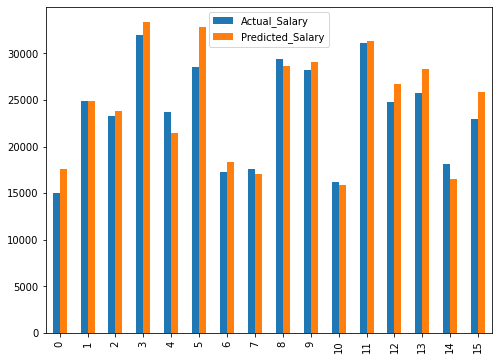

In [37]:
compare.plot(kind = 'bar', figsize = (8,6))
plt.show()

# Evaluation of model 

In [38]:
from sklearn import metrics
print('R2 - SCORE :', regressor.score(X_test_scaled, y_test))

R2 - SCORE : 0.8731682635688499


From this, we can see that the R2 - Score value is 0.87 which is very good.

So we can conclude saying that our model accuracy is 87% which means this is a very good model.

# Feature importance

In [39]:
coef = pd.DataFrame(regressor.coef_, ['Sex','Rank','Year','Degree','YSdeg'], columns = ['coefficient'])
coef

,coefficient
Sex,784.772206
Rank,4944.833448
Year,3126.107265
Degree,-627.134778
YSdeg,-1675.903844


By looking at the absolute value of all the coefficients, we can see that the features which impacts more on the salary are


1.   Rank
2.   Year
3.   YSDeg - Years since highest degree was earned

So, we can conclude that Sex has no impact on Salary.

